In [49]:
words = open("names.txt", "r").read().splitlines()

In [50]:
b = {}

for w in words:
    chs = ["<S>"] + list(w) + ["<E>"]
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram, 0) + 1

In [51]:
sorted(b.items(), key = lambda kv: -kv[1])

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [52]:
import torch

In [53]:
N = torch.zeros((27, 27), dtype = torch.int32)

In [54]:
chars = sorted(list(set(''.join(words))))
stoi = {s: i + 1 for i, s in enumerate(chars)}
stoi["."] = 0
itos = {i: s for s, i in stoi.items()}

In [55]:
for w in words:
    chs = ["."] + list(w) + ["."]
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1

In [56]:
N

tensor([[   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
         1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
          134,  535,  929],
        [6640,  556,  541,  470, 1042,  692,  134,  168, 2332, 1650,  175,  568,
         2528, 1634, 5438,   63,   82,   60, 3264, 1118,  687,  381,  834,  161,
          182, 2050,  435],
        [ 114,  321,   38,    1,   65,  655,    0,    0,   41,  217,    1,    0,
          103,    0,    4,  105,    0,    0,  842,    8,    2,   45,    0,    0,
            0,   83,    0],
        [  97,  815,    0,   42,    1,  551,    0,    2,  664,  271,    3,  316,
          116,    0,    0,  380,    1,   11,   76,    5,   35,   35,    0,    0,
            3,  104,    4],
        [ 516, 1303,    1,    3,  149, 1283,    5,   25,  118,  674,    9,    3,
           60,   30,   31,  378,    0,    1,  424,   29,    4,   92,   17,   23,
            0,  317,    1],
        [3983,  679,  121,  153,  384, 1271,   82,

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot: >

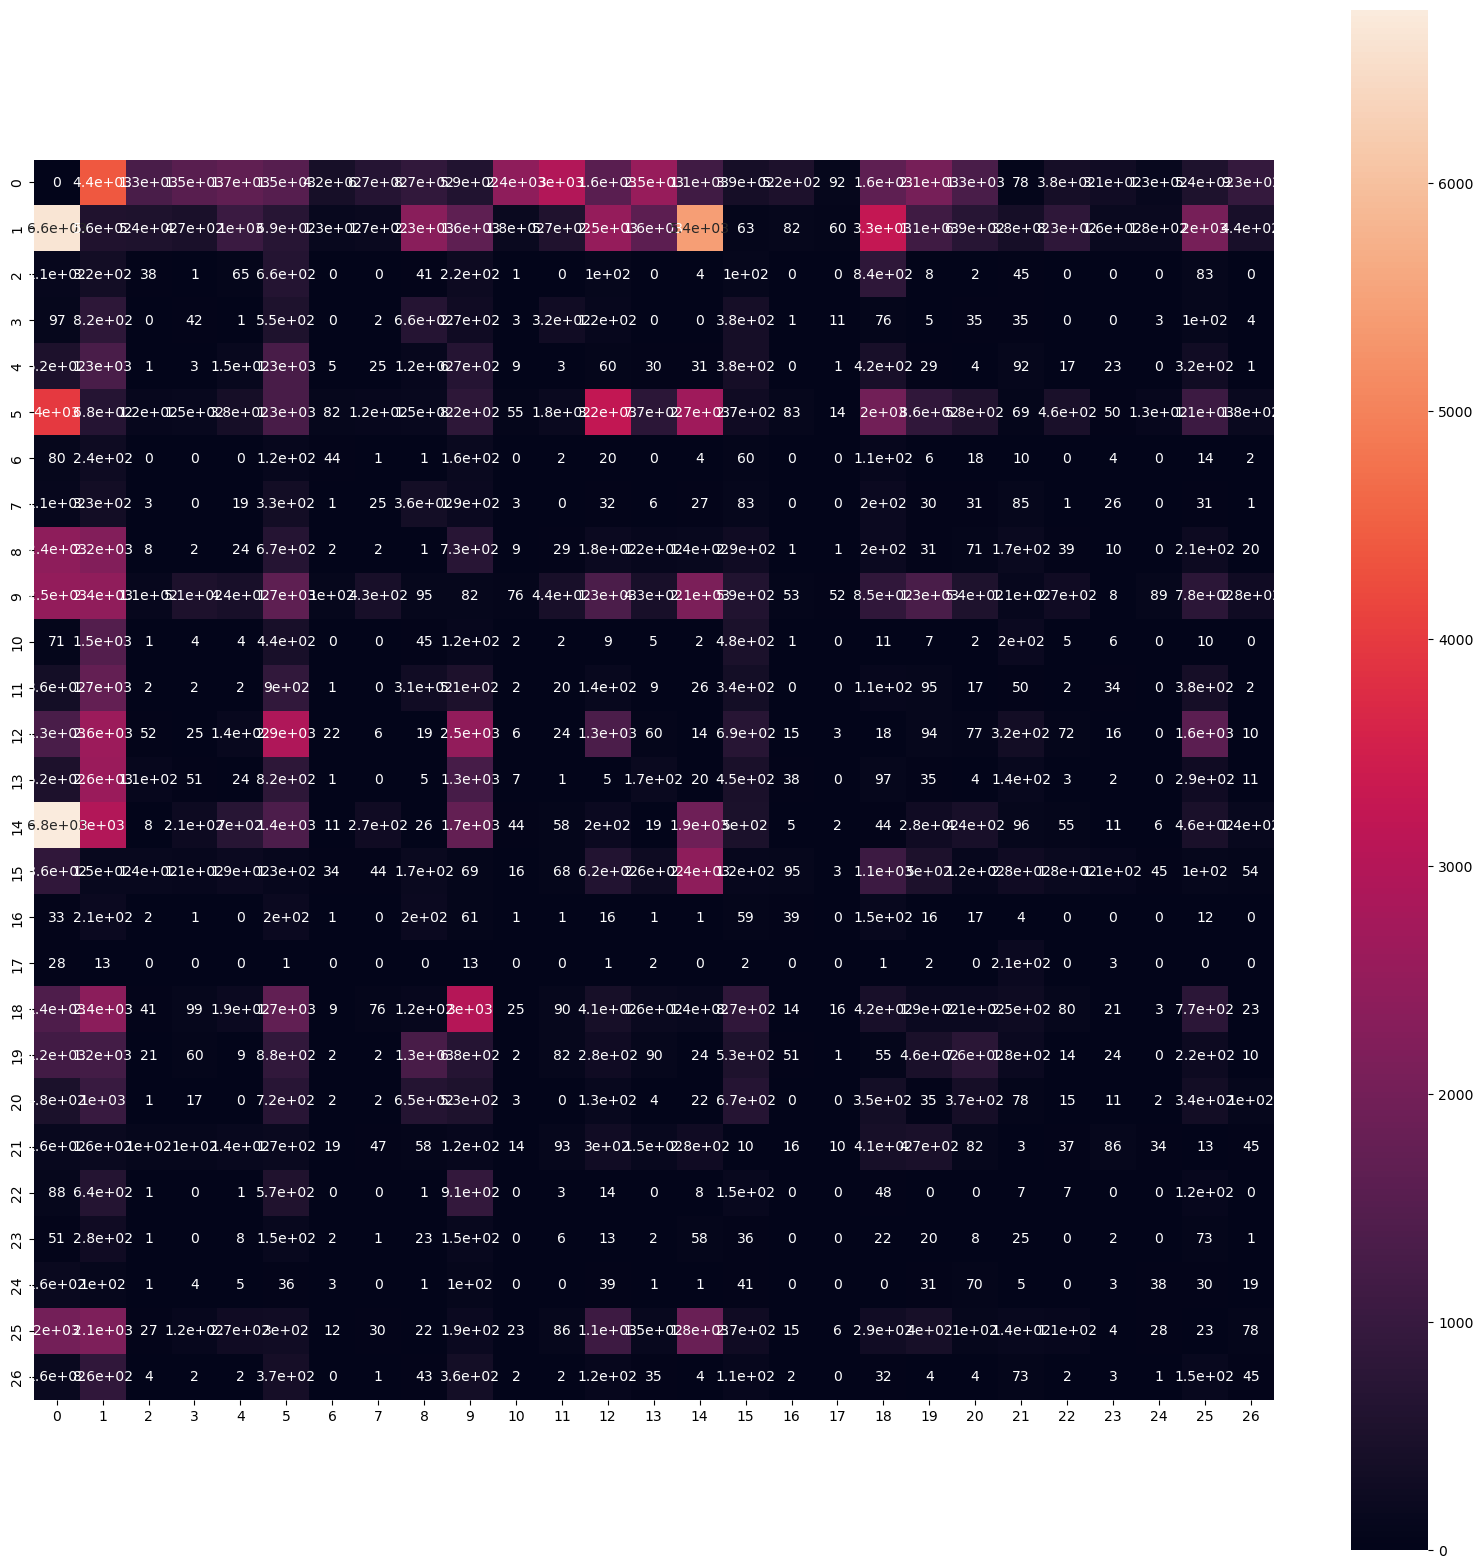

In [58]:
plt.figure(figsize = (20, 20))
sns.heatmap(N, annot = True, square = True)

(-0.5, 26.5, 26.5, -0.5)

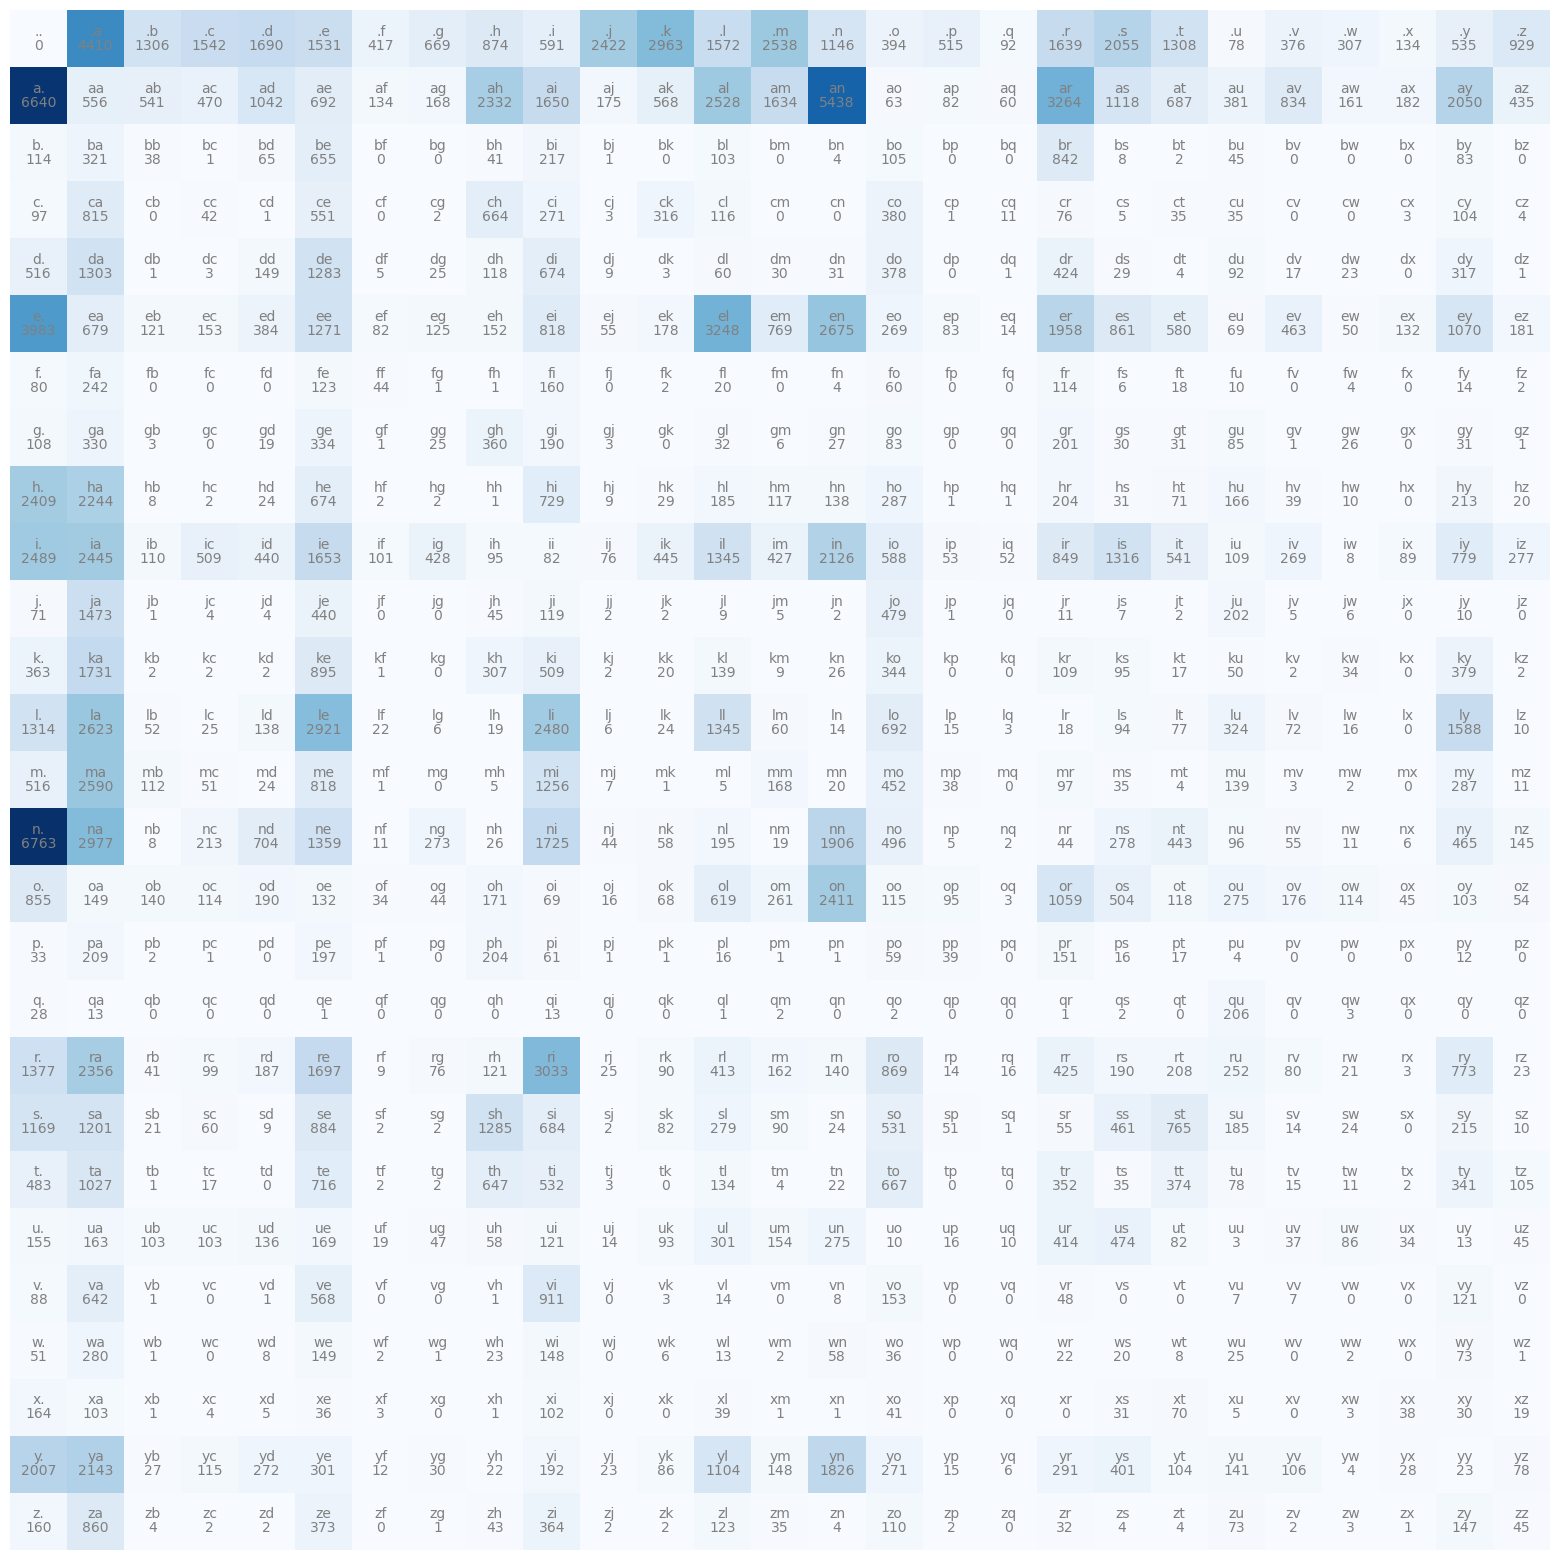

In [59]:
plt.figure(figsize = (20, 20))

plt.imshow(N, cmap = 'Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha = "center", va = "bottom", color = "gray")
        plt.text(j, i, N[i, j].item(), ha = "center", va = "top", color = "gray")
        
plt.axis("off")

In [60]:
P = (N + 1).float()
P /= P.sum(1, keepdim = True)

In [61]:
# 27, 27
# 27,  1

In [62]:
g = torch.Generator().manual_seed(2147483647)

for i in range (5):
    out = []
    ix = 0
    while True:
        p = P[ix]
        ix = torch.multinomial(p, num_samples = 1, replacement = True, generator = g).item()
        out.append(itos[ix])
        if ix == 0:
            break

    print(''.join(out))

mor.
axx.
minaymoryles.
kondlaisah.
anchshizarie.


In [63]:
# log(a*b*c) = log(a) + log(b) + log(c)

In [69]:
log_likelihood = 0.0
n = 0

for w in words:
    chs = ["."] + list(w) + ["."]
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n += 1
        print(f"{ch1}{ch2}: {prob:.4f} {logprob:.4f}")
        
print(f"{log_likelihood=}")
nll = -log_likelihood
print(f"{nll=}")
print(f"{nll/n=}")

.a: 0.1376 -1.9835
an: 0.1604 -1.8302
nd: 0.0384 -3.2594
dr: 0.0770 -2.5646
re: 0.1334 -2.0143
ej: 0.0027 -5.9004
jq: 0.0003 -7.9817
q.: 0.0970 -2.3331
log_likelihood=tensor(-27.8672)
nll=tensor(27.8672)
nll/n=tensor(3.4834)


In [33]:
1/27

0.037037037037037035

In [ ]:
# Using Neural Nets

In [ ]:
# Quick Recap

In [124]:
nlls = torch.zeros(5)
for i in range(5):
    # i-th bigram:
    x = xs[i].item() # input character index
    y = ys[i].item() # label character index
    print('--------')
    print(f'bigram example {i+1}: {itos[x]}{itos[y]} (indexes {x},{y})')
    print('input to the neural net:', x)
    print('output probabilities from the neural net:', probs[i])
    print('label (actual next character):', y)
    p = probs[i, y]
    print('probability assigned by the net to the the correct character:', p.item())
    logp = torch.log(p)
    print('log likelihood:', logp.item())
    nll = -logp
    print('negative log likelihood:', nll.item())
    nlls[i] = nll

print('=========')
print('average negative log likelihood, i.e. loss =', nlls.mean().item())

--------
bigram example 1: .e (indexes 0,5)
input to the neural net: 0
output probabilities from the neural net: tensor([0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
        0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
        0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459],
       grad_fn=<SelectBackward0>)
label (actual next character): 5
probability assigned by the net to the the correct character: 0.012286253273487091
log likelihood: -4.3992743492126465
negative log likelihood: 4.3992743492126465
--------
bigram example 2: em (indexes 5,13)
input to the neural net: 5
output probabilities from the neural net: tensor([0.0290, 0.0796, 0.0248, 0.0521, 0.1989, 0.0289, 0.0094, 0.0335, 0.0097,
        0.0301, 0.0702, 0.0228, 0.0115, 0.0181, 0.0108, 0.0315, 0.0291, 0.0045,
        0.0916, 0.0215, 0.0486, 0.0300, 0.0501, 0.0027, 0.0118, 0.0022, 0.0472],
       grad_fn=<SelectBackward0>)
label (actual next characte

In [163]:
# create the training set of bigrams (x, y)
xs, ys = [], []

for w in words:
    chs = ["."] + list(w) + ["."]
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)
        
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print("Number of examples: ", num)

g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator = g, requires_grad = True)

Number of examples:  228146


In [166]:
# gradient descent
import torch.nn.functional as F

for k in range(100):
    # forward pass
    xenc = F.one_hot(xs, num_classes = 27).float()
    logits = xenc @ W # log-counts
    counts = logits.exp() # equivalent N
    probs = counts / counts.sum(1, keepdims = True)
    loss = -probs[torch.arange(num), ys].log().mean() + + 0.01 * (W ** 2).mean()
    print(loss.item())
    
    # backwards pass
    W.grad = None
    loss.backward()
    
    # update
    W.data += -50 * W.grad

2.4834258556365967
2.4833858013153076
2.4833483695983887
2.4833130836486816
2.4832797050476074
2.483247756958008
2.4832167625427246
2.483186960220337
2.4831581115722656
2.4831299781799316
2.483102798461914
2.483076333999634
2.48305082321167
2.4830260276794434
2.483001232147217
2.4829773902893066
2.482954263687134
2.48293137550354
2.4829092025756836
2.4828872680664062
2.482865571975708
2.4828453063964844
2.4828243255615234
2.482804298400879
2.4827845096588135
2.482764959335327
2.48274564743042
2.482727289199829
2.482708692550659
2.4826903343200684
2.4826724529266357
2.4826548099517822
2.482637643814087
2.4826207160949707
2.4826037883758545
2.4825870990753174
2.4825708866119385
2.4825544357299805
2.482538938522339
2.482522964477539
2.4825079441070557
2.482492446899414
2.4824774265289307
2.4824626445770264
2.482448101043701
2.482433557510376
2.48241925239563
2.482405185699463
2.482390880584717
2.482377052307129
2.48236346244812
2.4823503494262695
2.4823367595672607
2.48232364654541
2.4823

In [168]:
g = torch.Generator().manual_seed(2147483647)

for i in range (5):
    out = []
    ix = 0
    while True:
        xenc = F.one_hot(torch.tensor([ix]), num_classes = 27).float()
        logits = xenc @ W # log-counts
        counts = logits.exp() # equivalent N
        p = counts / counts.sum(1, keepdims = True)
        
        ix = torch.multinomial(p, num_samples = 1, replacement = True, generator = g).item()
        out.append(itos[ix])
        
        if ix == 0:
            break

    print(''.join(out))


mor.
axx.
minaymoryles.
kondlaisah.
anchthizarie.
